<a href="https://colab.research.google.com/github/chrisrichardson/FEMexamples/blob/main/04_Iterative_Solver_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iterative methods of solution



---



## Jacobi iteration

Using the basic idea of solving a diffusion equation to relax a solution, we can see how Jacobi iteration works. You can try experimenting with the size of the problem (N) or the number of iterations. The solution should be a negated sine wave $1\over 9$ of the amplitude of the original one.



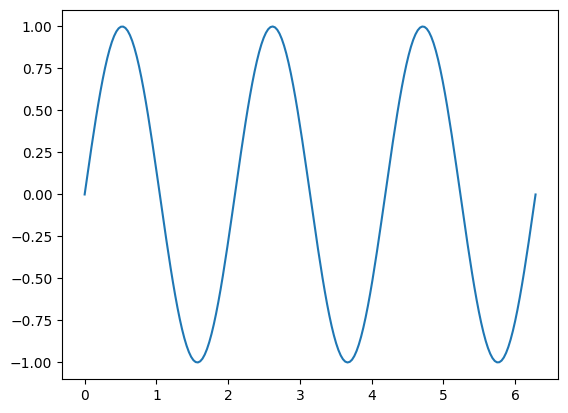

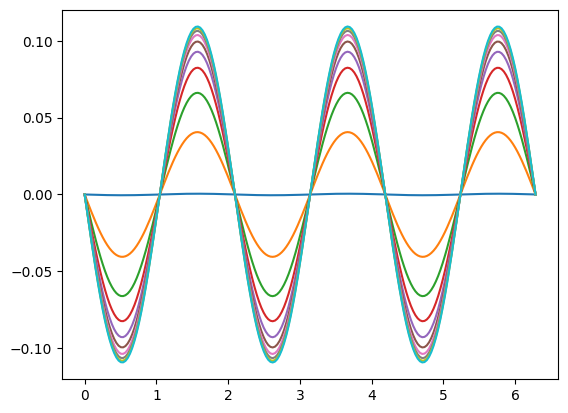

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import lil_matrix
from scipy.sparse.linalg import spsolve


# Create a vector 'b' with a sine wave
N = 200
x = np.linspace(0, 2*np.pi, N)
b = np.sin(3*x)
dx = x[1] - x[0]
dx2 = dx**2

plt.plot(x, b)
plt.show()

# Initial solution 'u' set to zero
u = np.zeros(N)

# Each iteration, advance time forwards using a finite difference scheme
# with dt chosen so that the u[i] term on the right hand side is zero.
def relax(u, b):
  unew = np.zeros_like(u)
  for i in range(1, N-1):
    dt = dx2/2
    unew[i] = dt*((u[i-1] - 2 * u[i] + u[i+1])/dx2 - b[i]) + u[i]
  return unew

# Repeat many times
# Plot every 10 iterations
niter = 1000
for i in range(niter):
  u = relax(u, b)
  if i%100 == 0: plt.plot(x, u)
plt.show()


## Reformulating as a sparse matrix

We know that the Poisson problem can be written in matrix form. Let's create it using `scipy.sparse.lil_matrix`

In [156]:
A = lil_matrix((N, N))
# Set the end values to 1, this will fix the boundaries
A[0,0] = 1.0
A[N-1, N-1] = 1.0
# Set the 1D finite difference Poisson stencil in the interior
for i in range(1, N-1):
  A[i, i] = -2.0/dx2
for i in range(1, N-1):
  A[i, i+1] = 1.0/dx2
  A[i, i-1] = 1.0/dx2


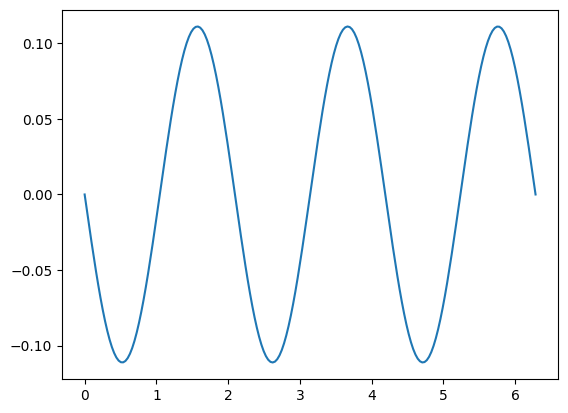

In [157]:
# Check that we can solve it using a direct "LU" solver
u = spsolve(A.tocsr(), b)
plt.plot(x, u)
plt.show();

### Jacobi by matrix multiplication

The Jacobi iteration is given by:

$$u_{i+1} = (b - A_d u_i)/d$$

where $A_d$ is $A$ minus the diagonal term, and $d$ is the diagonal term of $A$.

In [166]:
# Save the diagonal to d
d = np.zeros(N)
for i in range(N):
  d[i] = A[i, i]

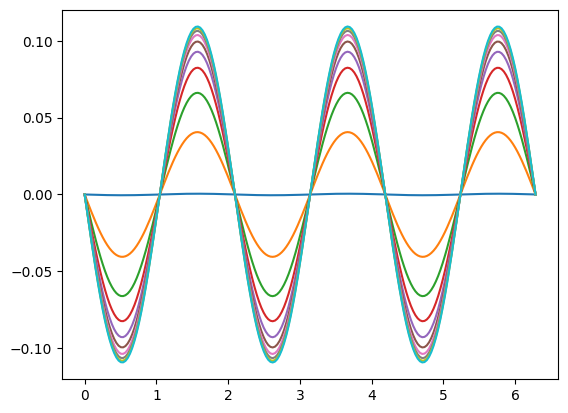

In [167]:
u = np.zeros(N)

def iterate(u, b):
  unew = u - (A @ u - b)/d
  return unew

niter = 1000
for i in range(niter):
  u = iterate(u, b)
  if i%100 == 0: plt.plot(x, u)

plt.show()

Jacobi iteration is slow, and just like diffusion, it slows down with time, so it only approaches the correct solution very slowly.

On the plus side, it is very simple.